In [1]:
import os
import json
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import pandas as pd



In [2]:
data = pd.read_csv(r'C:\Users\tqz828\Documents\ds_bootcamp_project2\bank\bank.csv', sep =';',na_values='unknown')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
max(data["age"])
min(data["age"])


18

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [7]:
data["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [9]:
data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [10]:
data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [11]:
data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [12]:
data["poutcome"].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

In [13]:
data.groupby(['poutcome','y']).size()

poutcome  y  
failure   no     4283
          yes     618
other     no     1533
          yes     307
success   no      533
          yes     978
dtype: int64

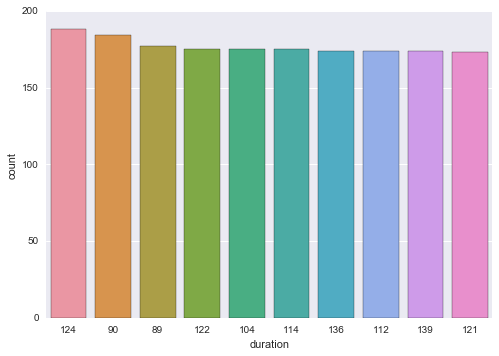

In [14]:
sns.countplot(data["duration"],  order=data["duration"].value_counts().iloc[:10].index)

In [15]:
# top 10 counts in a column
data["duration"].value_counts().iloc[:10]

124    188
90     184
89     177
122    175
104    175
114    175
136    174
112    174
139    174
121    173
Name: duration, dtype: int64

In [16]:
b = data["duration"].value_counts().iloc[:10]

In [17]:
data.groupby(['duration','y']).size()

duration  y  
0         no      3
1         no      2
2         no      3
3         no      4
4         no     15
5         no     35
6         no     45
7         no     73
8         no     84
          yes     1
9         no     77
10        no     76
11        no     96
          yes     1
12        no     80
13        no     88
14        no     84
15        no     85
16        no     88
17        no     81
18        no     94
19        no     71
20        no     83
21        no     79
22        no     87
23        no     76
          yes     1
24        no     80
25        no     78
          yes     1
                 ..
2389      no      1
2420      yes     1
2429      no      1
2453      yes     1
2456      yes     1
2462      no      1
2485      no      1
2516      yes     1
2621      yes     1
2635      no      1
2653      yes     1
2692      yes     1
2769      yes     1
2770      yes     1
2775      yes     1
2870      no      1
3025      no      1
3076      yes     1
3078  

In [18]:
data["duration"].value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, dtype: int64

In [19]:
data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [20]:
data_deposit = data[data["y"]=="yes"]

In [21]:
data_deposit.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


In [22]:
data_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
86,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
87,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
129,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
168,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


In [23]:
data_deposit["poutcome"].value_counts()

success    978
failure    618
other      307
Name: poutcome, dtype: int64

In [24]:
data_deposit["previous"].value_counts()

0     3384
1      583
2      456
3      294
4      171
5      121
6       83
7       54
8       39
10      26
9       24
11      15
12      10
13       9
14       5
17       3
19       2
20       1
15       1
58       1
30       1
21       1
29       1
23       1
22       1
26       1
55       1
Name: previous, dtype: int64

In [25]:
data_deposit["pdays"].value_counts()

-1      3384
 92       96
 182      80
 91       75
 181      74
 183      64
 184      46
 94       35
 93       34
 95       32
 90       31
 87       28
 98       25
 97       24
 185      23
 96       21
 187      19
 99       19
 180      17
 88       17
 186      16
 188      15
 179      15
 189      14
 195      14
 178      13
 104      13
 105      13
 89       13
 196      12
        ... 
 69        1
 65        1
 421       1
 425       1
 437       1
 445       1
 234       1
 230       1
 222       1
 206       1
 158       1
 142       1
 62        1
 58        1
 34        1
 22        1
 14        1
 6         1
 603       1
 769       1
 761       1
 749       1
 553       1
 541       1
 529       1
 481       1
 477       1
 469       1
 449       1
 4         1
Name: pdays, dtype: int64

In [26]:
data_deposit["contact"].value_counts()

cellular     4369
telephone     390
Name: contact, dtype: int64

In [27]:
###data_deposit.hist(column="age", by="contact")

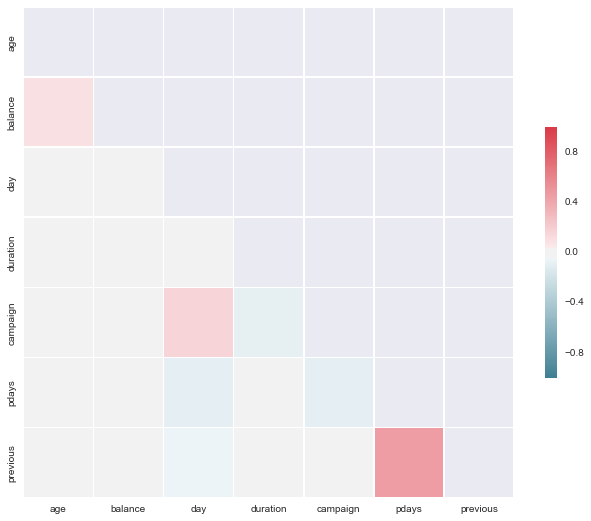

In [28]:
### Correlation matrix for Numeric values

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)